In [3]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path = './'
train_dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
val_dataset = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

class_labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)
loss_per_epoch = []

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class CIFAR10Net(nn.Module):
    def __init__(self):
        super(CIFAR10Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

Using device: cuda
Epoch 1/20, Loss: 2.058026075363159
Epoch 2/20, Loss: 1.7714567184448242
Epoch 3/20, Loss: 1.6885044574737549
Epoch 4/20, Loss: 1.6987861394882202
Epoch 5/20, Loss: 1.5702459812164307
Epoch 6/20, Loss: 1.6425946950912476
Epoch 7/20, Loss: 1.4673620462417603
Epoch 8/20, Loss: 1.4581819772720337
Epoch 9/20, Loss: 1.5559766292572021
Epoch 10/20, Loss: 1.3449758291244507
Epoch 11/20, Loss: 1.5367858409881592
Epoch 12/20, Loss: 1.5685389041900635
Epoch 13/20, Loss: 1.502509355545044
Epoch 14/20, Loss: 1.286425232887268
Epoch 15/20, Loss: 1.362980604171753
Epoch 16/20, Loss: 1.2771047353744507
Epoch 17/20, Loss: 1.326725721359253
Epoch 18/20, Loss: 1.2162220478057861
Epoch 19/20, Loss: 1.546310544013977
Epoch 20/20, Loss: 1.164687156677246
Accuracy: 52.46%
Precision: 0.5204972765147887
Recall: 0.5246
F1 Score: 0.5208907881384878


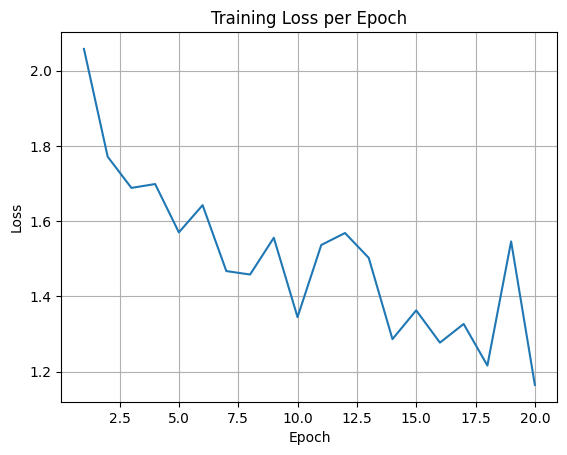

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

model = CIFAR10Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Training Loop
epochs = 20
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
    
    loss_per_epoch.append(loss.item())
    
# Validation Loop

model.eval()
all_predictions = []
all_targets = [] 
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.tolist())
        all_targets.extend(targets.tolist())
        
accuracy = 100 * sum([p == t for p, t in zip(all_predictions, all_targets)]) / len(all_targets)
precision = precision_score(all_targets, all_predictions, average='weighted')
recall = recall_score(all_targets, all_predictions, average='weighted')
f1 = f1_score(all_targets, all_predictions, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
plt.plot(range(1, len(loss_per_epoch)+1), loss_per_epoch)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid(True)
plt.show()

Accuracy: 52.46%
Precision: 0.5204972765147887
Recall: 0.5246
F1 Score: 0.5208907881384878


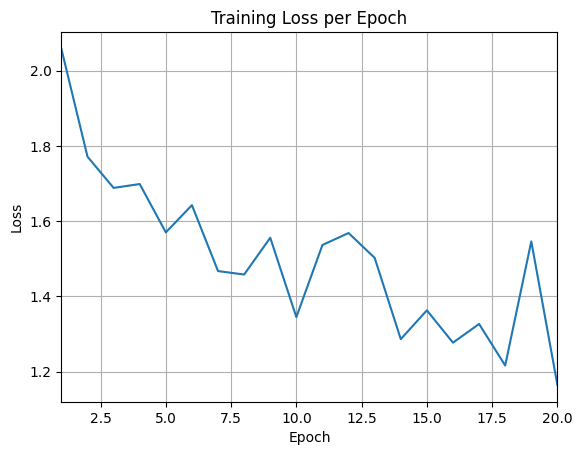

In [6]:
print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
plt.plot(range(1, len(loss_per_epoch)+1), loss_per_epoch)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid(True)
plt.xlim(1, 20)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_targets, all_predictions)
print(conf_matrix)

[[564  32  60  23  34  12  25  35 170  45]
 [ 34 628  15  20  15  13  20  29  81 145]
 [ 75  16 392  76 154  67 100  80  28  12]
 [ 28  15  88 341  57 184 127  78  35  47]
 [ 46  15 132  49 435  38 131 111  30  13]
 [ 17  15  95 180  74 397  75  93  28  26]
 [  5  15  56  74 125  39 615  32  16  23]
 [ 29  21  42  60  71  65  20 633  21  38]
 [ 79  73  15  22  23  28   4  18 691  47]
 [ 34 192  13  31  16  17  21  48  78 550]]


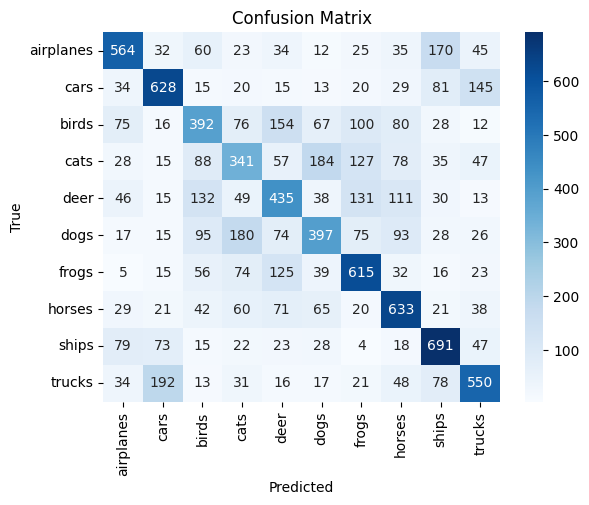

In [11]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()